In [1]:
from nico import Annotations as sann
from nico import Interactions as sint
from nico import Covariations as scov

#import Annotations as sann
#import Interactions as sint
#import Covariations as scov

import scanpy as sc
#import gseapy
#import xlsxwriter

import numpy as np
import time
import os

import matplotlib


In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['axes.linewidth'] = 0.1 #set the value globally

import matplotlib.pyplot as plt
plt.rc('font', family='Helvetica')

In [3]:
print("Help me with the parameters of the function")

#print(sann.find_anchor_cells_between_ref_and_query.__doc__)
#print(sint.spatial_neighborhood_analysis.__doc__)
#print(scov.gene_covariation_analysis.__doc__)


Help me with the parameters of the function


# Perform Annotations 

In [4]:
anchors_and_neighbors_info=sann.find_anchor_cells_between_ref_and_query()


In [5]:
output_info=sann.nico_based_annotation(anchors_and_neighbors_info,
guiding_spatial_cluster_resolution_tag='leiden0.4',
across_spatial_clusters_dispersion_cutoff=0.15,
resolved_tie_issue_with_weighted_nearest_neighbor='No')

In [6]:
sann.delete_files(output_info)

The figures are saved:  ./inputQuery/MNN_based_annotations/visualize_anchors.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


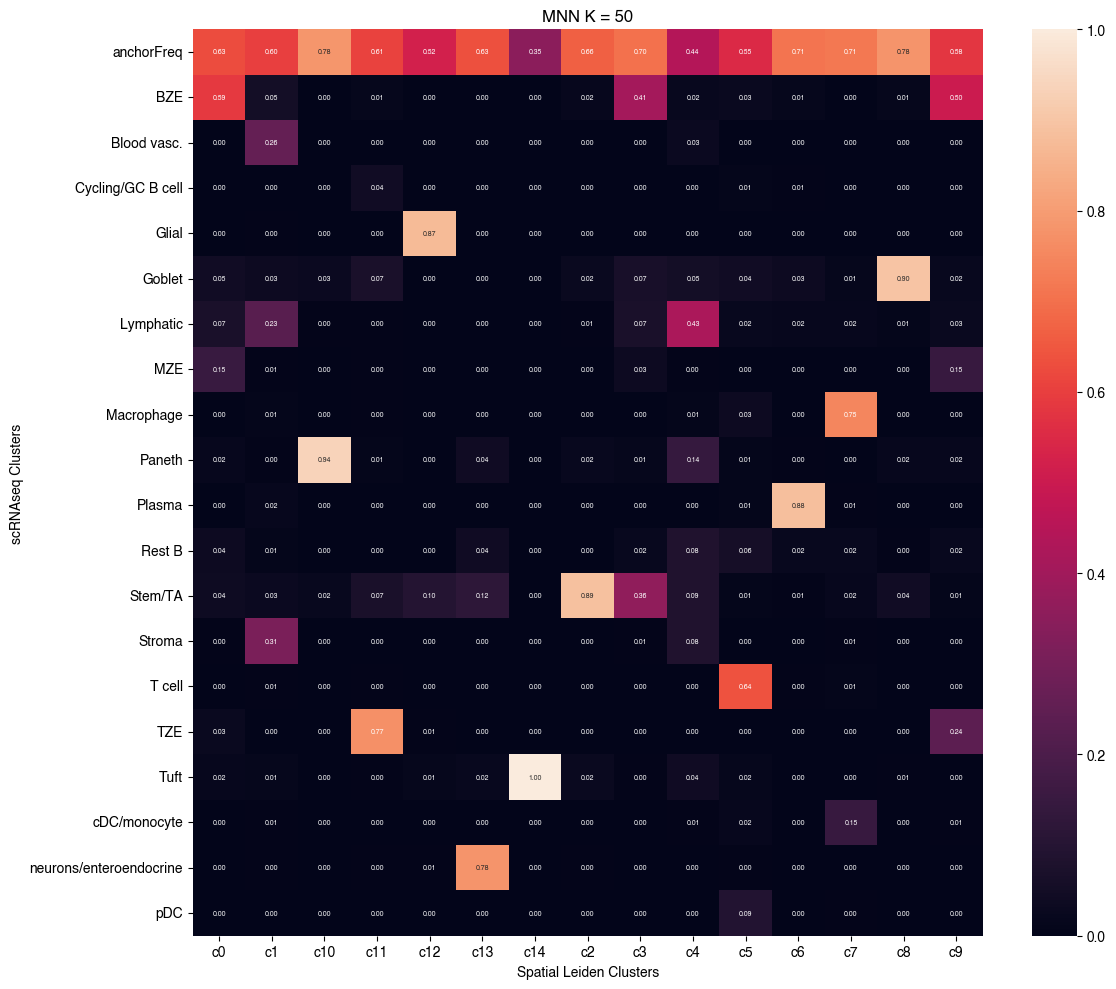

In [7]:
sann.visualize_spatial_anchored_cell_mapped_to_scRNAseq(output_info)

The figures are saved:  ./inputQuery/MNN_based_annotations/tissue_and_umap_with_all_celltype_annotations.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


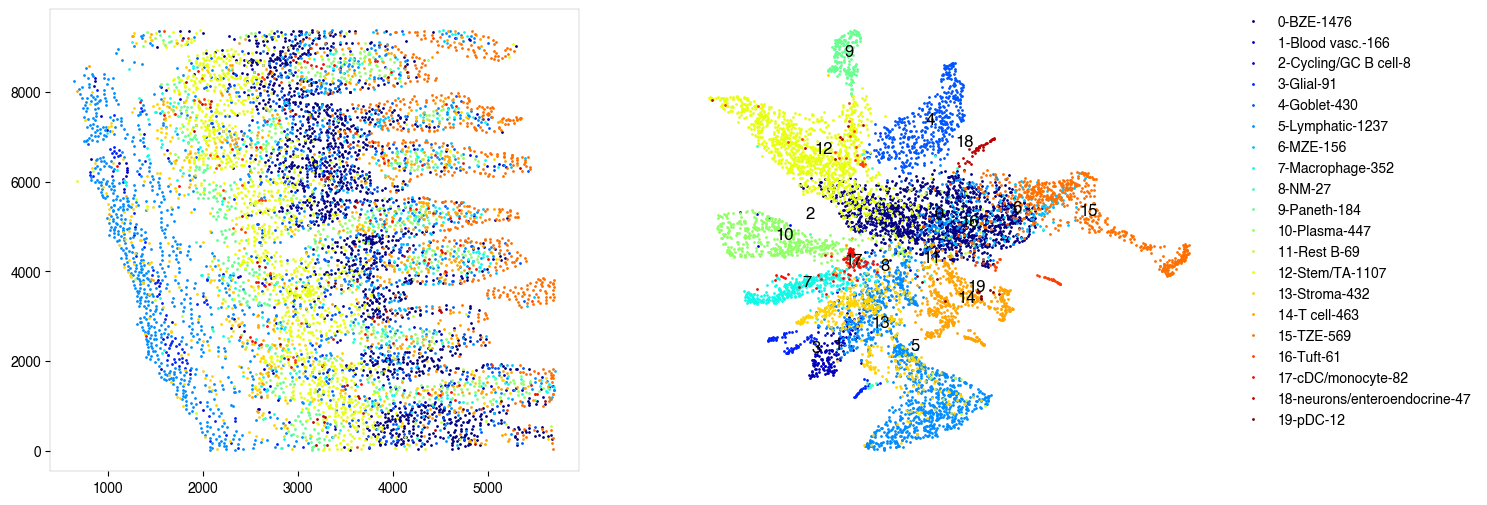

In [8]:
sann.visualize_umap_and_cell_coordinates_with_all_celltypes()

The figures are saved:  ./inputQuery/MNN_based_annotations/fig_individual_annotation/Stem_TA0.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


The figures are saved:  ./inputQuery/MNN_based_annotations/fig_individual_annotation/Paneth1.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


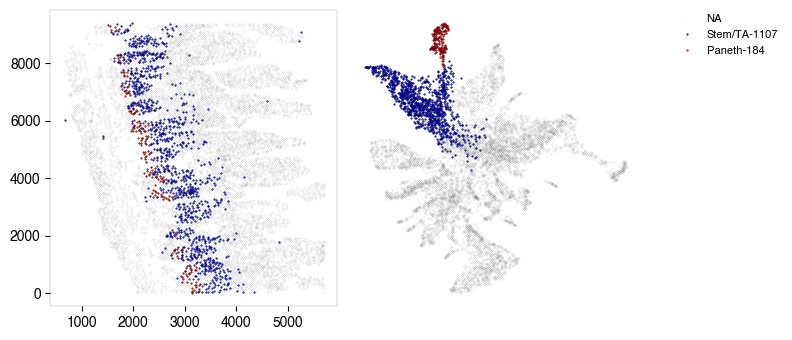

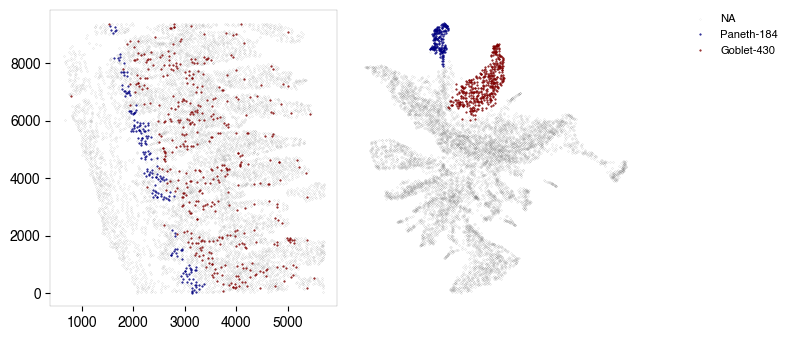

In [9]:
choose_celltypes=[['Stem/TA','Paneth'],['Paneth','Goblet']]

sann.visualize_umap_and_cell_coordinates_with_selected_celltypes(choose_celltypes=choose_celltypes)



In [10]:
#Plot all the cell types individually. 
#sann.visualize_umap_and_cell_coordinates_with_selected_celltypes(choose_celltypes=[])

# Predict niche interactions 

In [11]:
niche_pred_output=sint.spatial_neighborhood_analysis(Radius=0,
removed_CTs_before_finding_CT_CT_interactions=['NM','Basophils','Cycling/GC B cell','pDC'])


average neighbors: 4.850590310761297
data shape (7340, 19) (7340,) neighbor shape (7340, 17)
Searching hyperparameters  Grid method: 0.0009765625
Searching hyperparameters  Grid method: 0.001953125
Searching hyperparameters  Grid method: 0.001953125
Inverse of lambda regularization found 0.001953125
training (5872, 17) testing (1468, 17) coeff (17, 17)


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/TopCoeff_R0/Rank1_Paneth.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/TopCoeff_R0/Rank3_Stem_TA.pdf


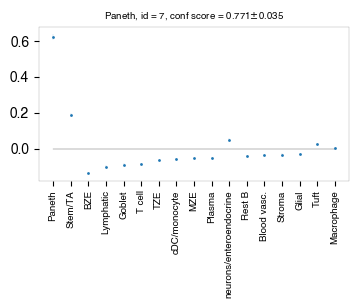

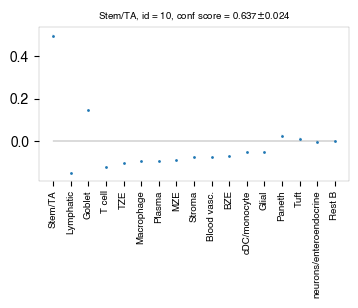

In [12]:
sint.find_interacting_cell_types(niche_pred_output,choose_celltypes=['Stem/TA','Paneth'])

In [12]:
#create for all the cell types 
#sint.find_interacting_cell_types(niche_pred_output,choose_celltypes=[])

The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/ROC_R0.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


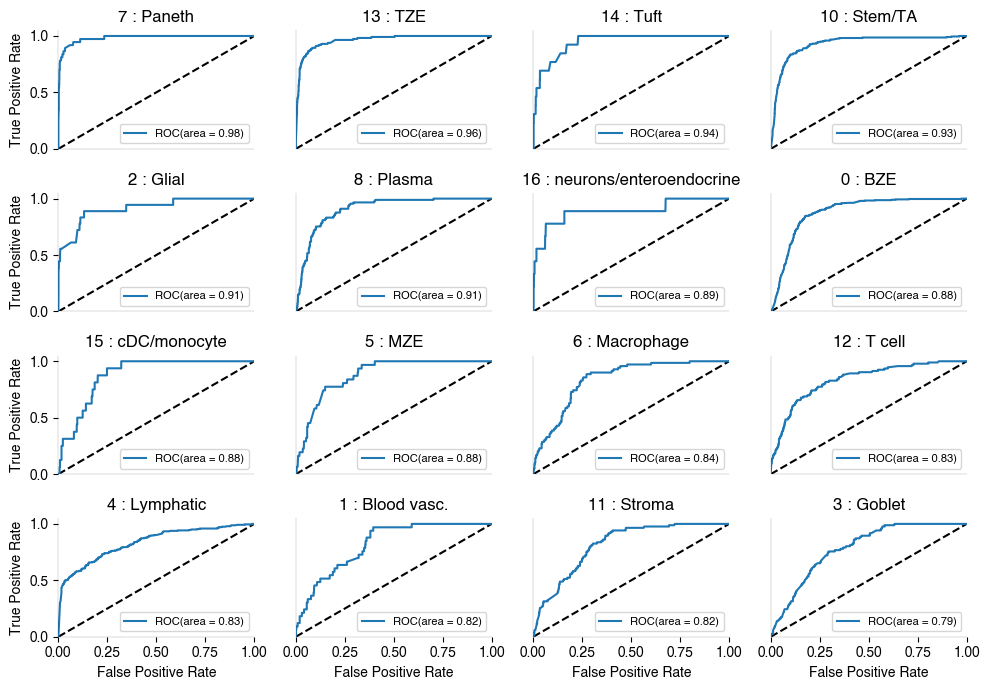

In [13]:
sint.plot_roc_results(niche_pred_output)


The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/Confusing_matrix_R0.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


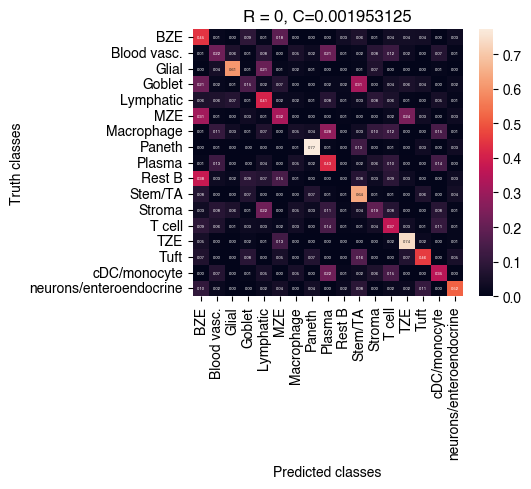

In [14]:
sint.plot_confusion_matrix(niche_pred_output)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/weight_matrix_R0.pdf


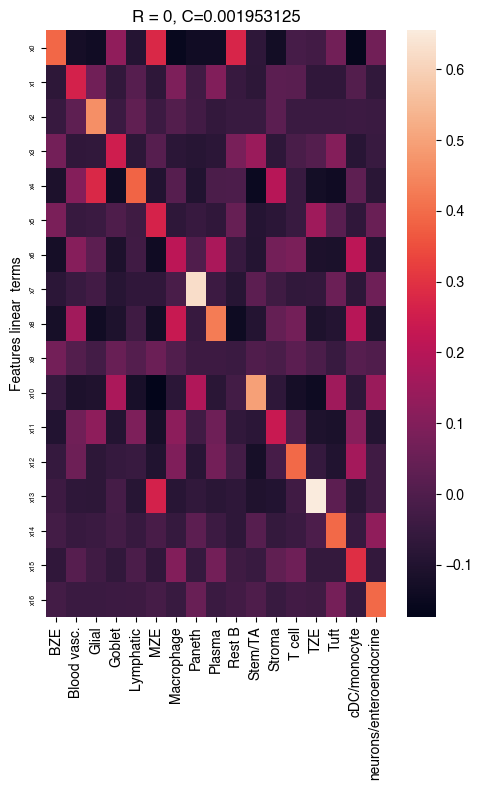

In [15]:
sint.plot_coefficient_matrix(niche_pred_output)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/scores_0.pdf


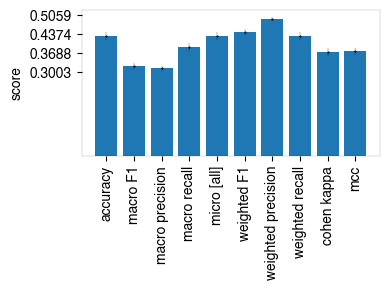

In [16]:
sint.plot_evaluation_scores(niche_pred_output, figsize=(4,3))

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/Niche_interactions_without_edge_weights_R0.pdf


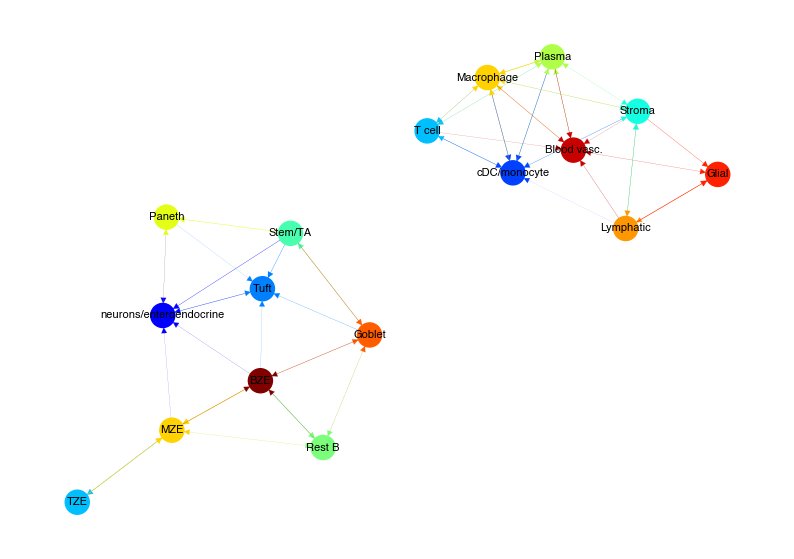

In [17]:
sint.plot_niche_interactions_without_edge_weight(niche_pred_output,niche_cutoff=0.04)


The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/Niche_interactions_with_edge_weights_R0.pdf


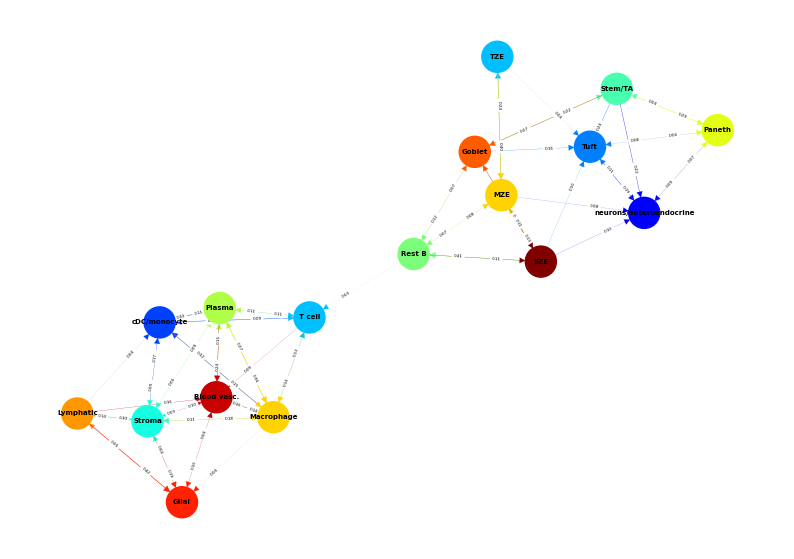

In [18]:
sint.plot_niche_interactions_with_edge_weight(niche_pred_output,niche_cutoff=0.03)


# Perform gene covariation analysis

In [19]:
all_output_data=scov.gene_covariation_analysis(iNMFmode=True,Radius=0,no_of_factors=3)



 Spatial and scRNA-seq number of clusters, respectively  17 19
Common cell types between spatial and scRNA-seq data   17 {'Plasma', 'T cell', 'Rest B', 'Macrophage', 'BZE', 'neurons/enteroendocrine', 'Tuft', 'Glial', 'Lymphatic', 'Blood vasc.', 'TZE', 'MZE', 'Stem/TA', 'Paneth', 'Goblet', 'cDC/monocyte', 'Stroma'}

The spatial cluster name does not match the scRNA-seq cluster name  set()
If the above answer is Null, then everything is okay. However, If any spatial cell type does not exist in scRNA-seq data, please correct this manually; otherwise, NiCo will not run. 





cell types found  ['Paneth']
These figures are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/NMF_output/
The figures are saved:  ./spatial_ct_ct_interactions/covariations_R0_F3/NMF_output/Paneth.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


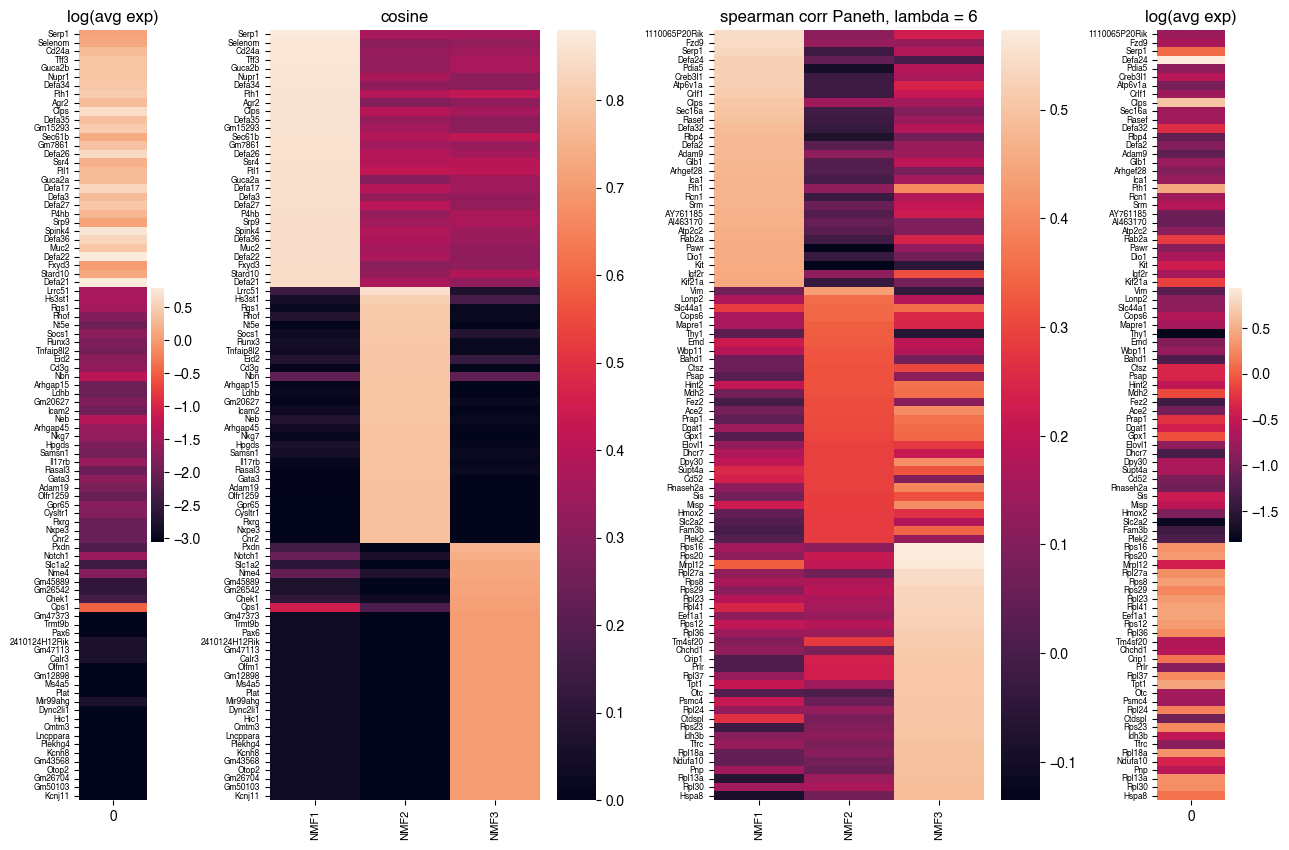

In [20]:
# Cosine and spearman correlation: visualize the correlation of top 30 genes to the factors of Paneth
scov.plot_cosine_and_spearman_correlation_to_factors(all_output_data,choose_celltypes=['Paneth'],NOG_Fa=30)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


The figures are saved:  ./spatial_ct_ct_interactions/covariations_R0_F3/dotplots/Factors_Stem_TA.pdf


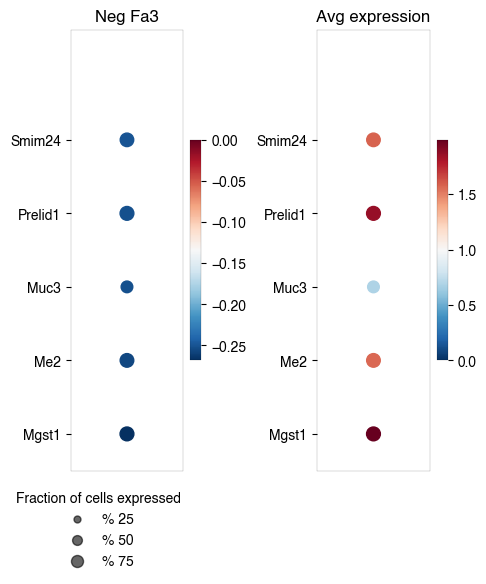

In [22]:
# Extract top 5 genes correlating with Spearman negatively with Stem/TA Fa1 

dataframe=scov.extract_and_plot_top_genes_from_chosen_factor_in_celltype(all_output_data,choose_celltype='Stem/TA',
choose_factor_id=3,top_NOG=5,correlation_with_spearman=True,positively_correlated=False)

In [23]:
dataframe

Gene        Fa  mean_expression  proportion_of_population_expressed
0    Mgst1 -0.268141         1.990478                            0.988095
1      Me2 -0.256496         1.565082                            0.959524
2     Muc3 -0.252232         0.689693                            0.702381
3  Prelid1 -0.251971         1.861355                            0.983333
4   Smim24 -0.249873         1.582775                            0.945238

cell types found  ['Stem/TA']
The regression figures as pvalue circle plots are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Regression_outputs/pvalue_coeff_circleplot_*


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


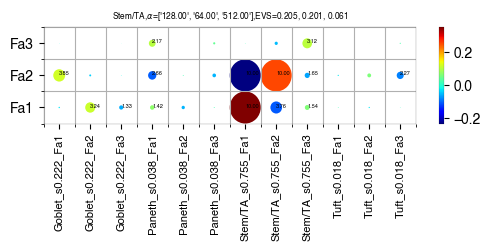

In [24]:
# Plot covariations as regression in Stem/TA niche using circleplot. 
choose_celltypes=['Stem/TA']
scov.plot_significant_regression_covariations_as_circleplot(all_output_data,choose_celltypes=choose_celltypes)


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


cell types found  ['Stem/TA']
The regression figures as pvalue circle plots are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Regression_outputs/pvalue_coeff_circleplot_*


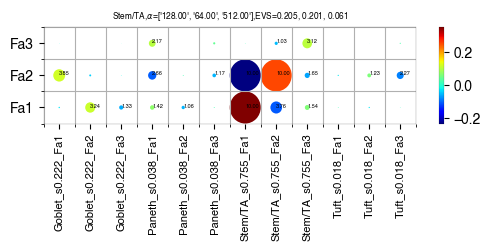

In [25]:
# Plot covariations as regression in Stem/TA niche using circleplot with mentioned p-value and increased cutoff. 
choose_celltypes=['Stem/TA']
scov.plot_significant_regression_covariations_as_circleplot(all_output_data,
            choose_celltypes=choose_celltypes,pvalue_cutoff=0.1,mention_pvalue=True)


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


cell types found  ['Stem/TA']
The regression figures as pvalue circle plots are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Regression_outputs/pvalue_coeff_circleplot_*


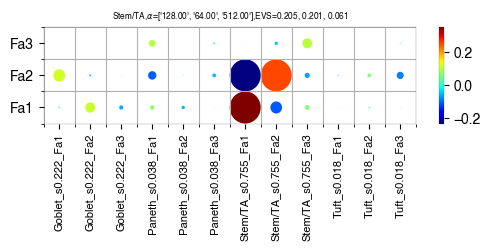

In [26]:
# Plot covariations as regression in Stem/TA niche using circleplot without mentioning p-value. 
choose_celltypes=['Stem/TA']
scov.plot_significant_regression_covariations_as_circleplot(all_output_data,
            choose_celltypes=choose_celltypes,pvalue_cutoff=0.05,mention_pvalue=False)

cell types found  ['Stem/TA']
The regression figures as pvalue heatmap plots are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Regression_outputs/pvalue_coeff_heatmap_*


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


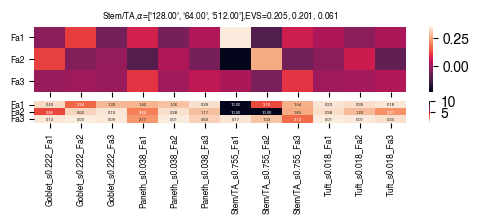

In [27]:
# Plot covariations as regression in Stem/TA niche using heatmap. 
scov.plot_significant_regression_covariations_as_heatmap(all_output_data,
    choose_celltypes=['Stem/TA'],saveas='pdf',transparent_mode='False',figsize=(6,1.25))


In [ ]:
# Plot covariations as regression for every celltype niche using heatmap. 
#scov.plot_significant_regression_covariations_as_heatmap(all_output_data,
#    choose_celltypes=[],saveas='pdf',transparent_mode='False',figsize=(6,1.25))

LR figures for both ways are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Plot_ligand_receptor_in_niche/
LR figures for CC to NC are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Plot_ligand_receptor_in_niche_cc_vs_nc/
LR figures for NC to CC are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Plot_ligand_receptor_in_niche_nc_vs_cc/


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


0

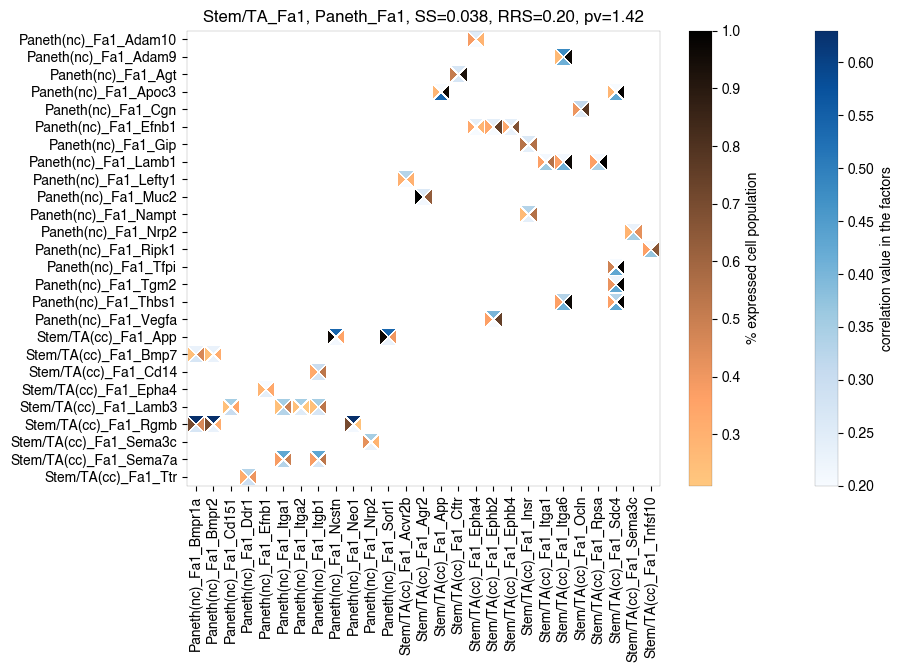

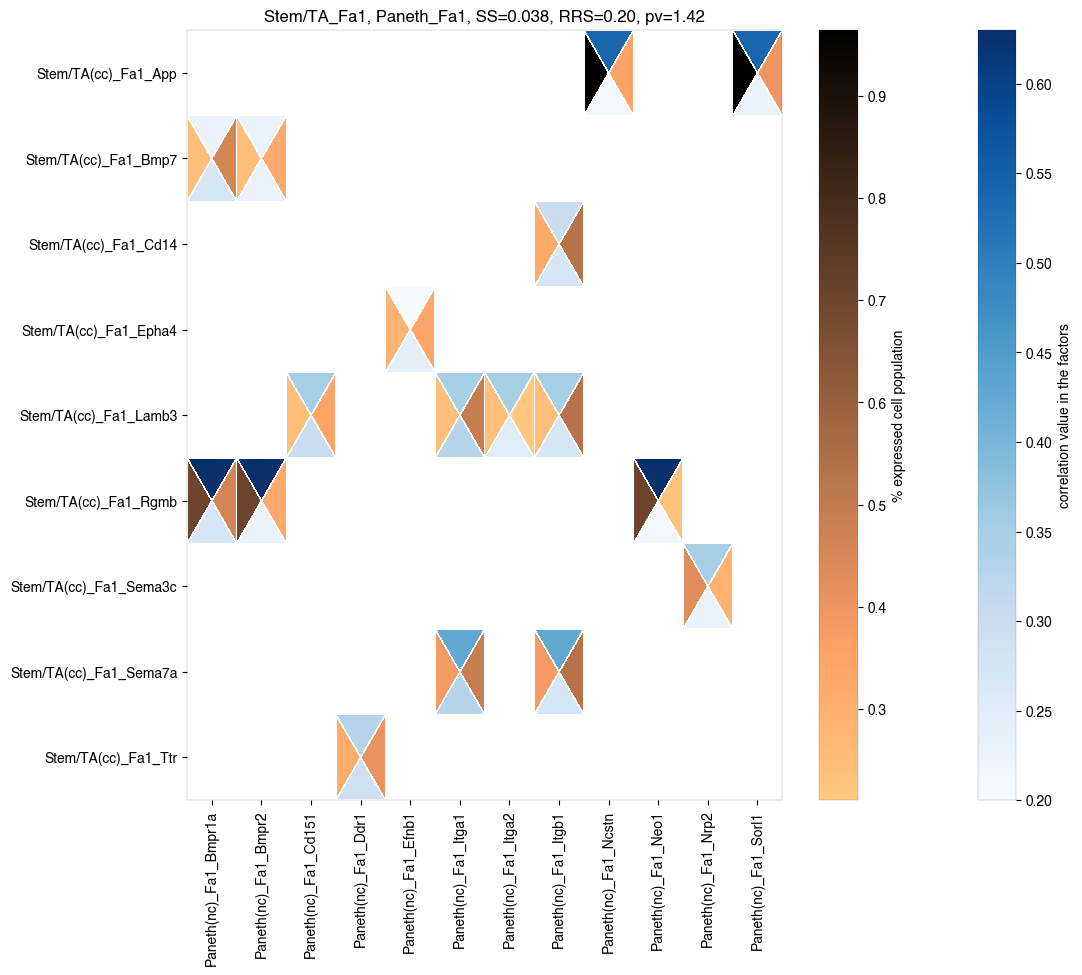

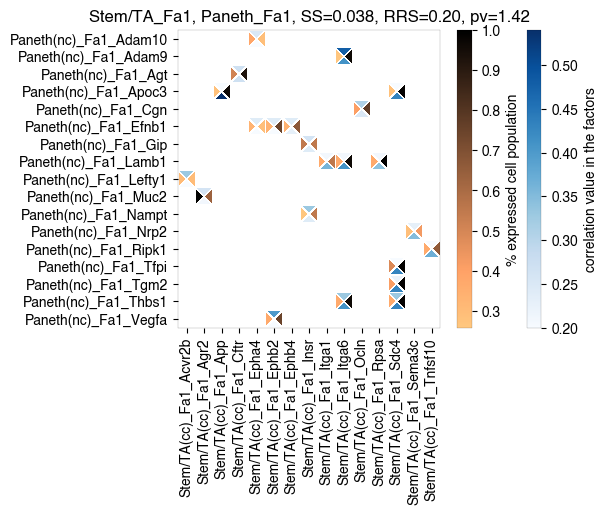

In [28]:
# Perform ligand receptors analysis in Fa1 of Stem/TA niche with Fa1 of Paneth 
choose_celltypes=['Stem/TA']
scov.find_LR_interactions_in_interacting_cell_types(all_output_data,
choose_interacting_celltype_pair=['Stem/TA','Paneth'],choose_factors_id=[1,1],pvalueCutoff=0.05,
    LR_plot_NMF_Fa_thres=0.2,LR_plot_Exp_thres=0.2)




LR figures for both ways are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Plot_ligand_receptor_in_niche/
LR figures for CC to NC are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Plot_ligand_receptor_in_niche_cc_vs_nc/
LR figures for NC to CC are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Plot_ligand_receptor_in_niche_nc_vs_cc/


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


0

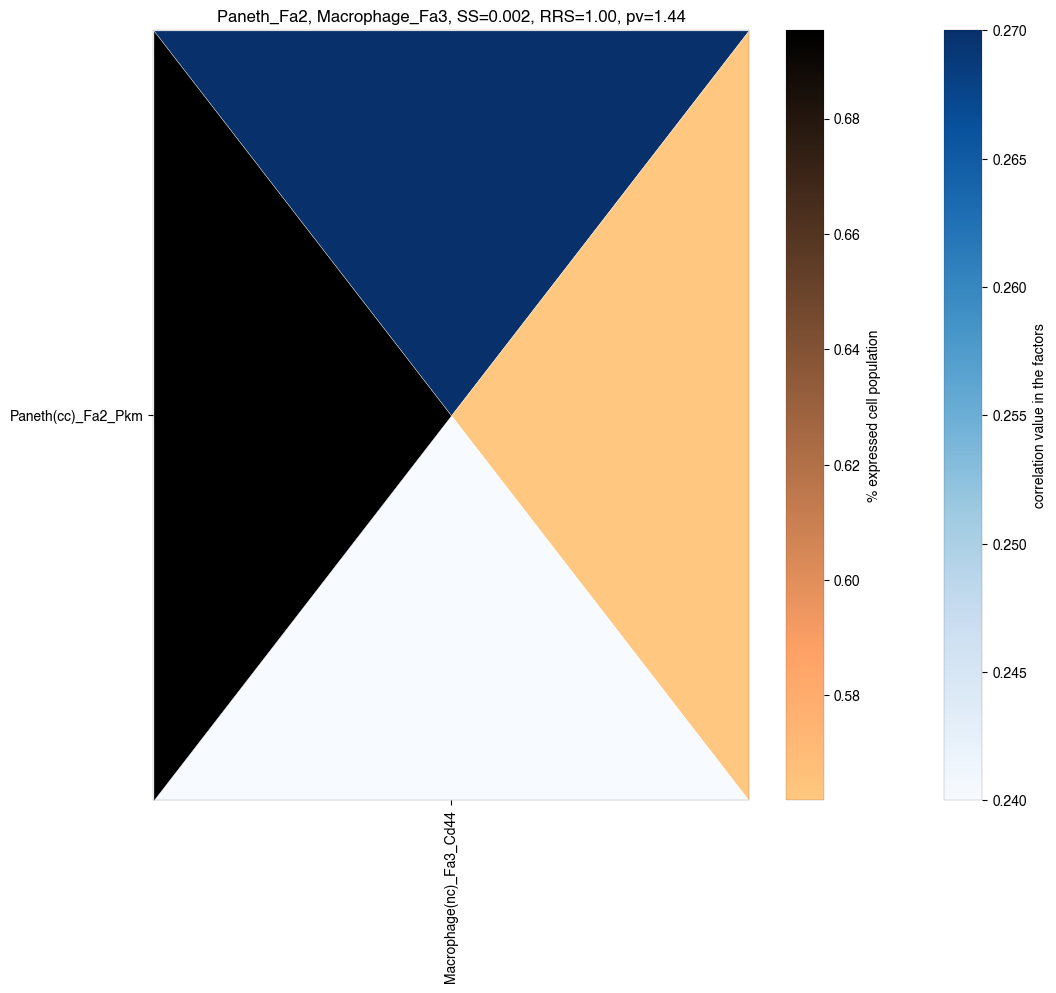

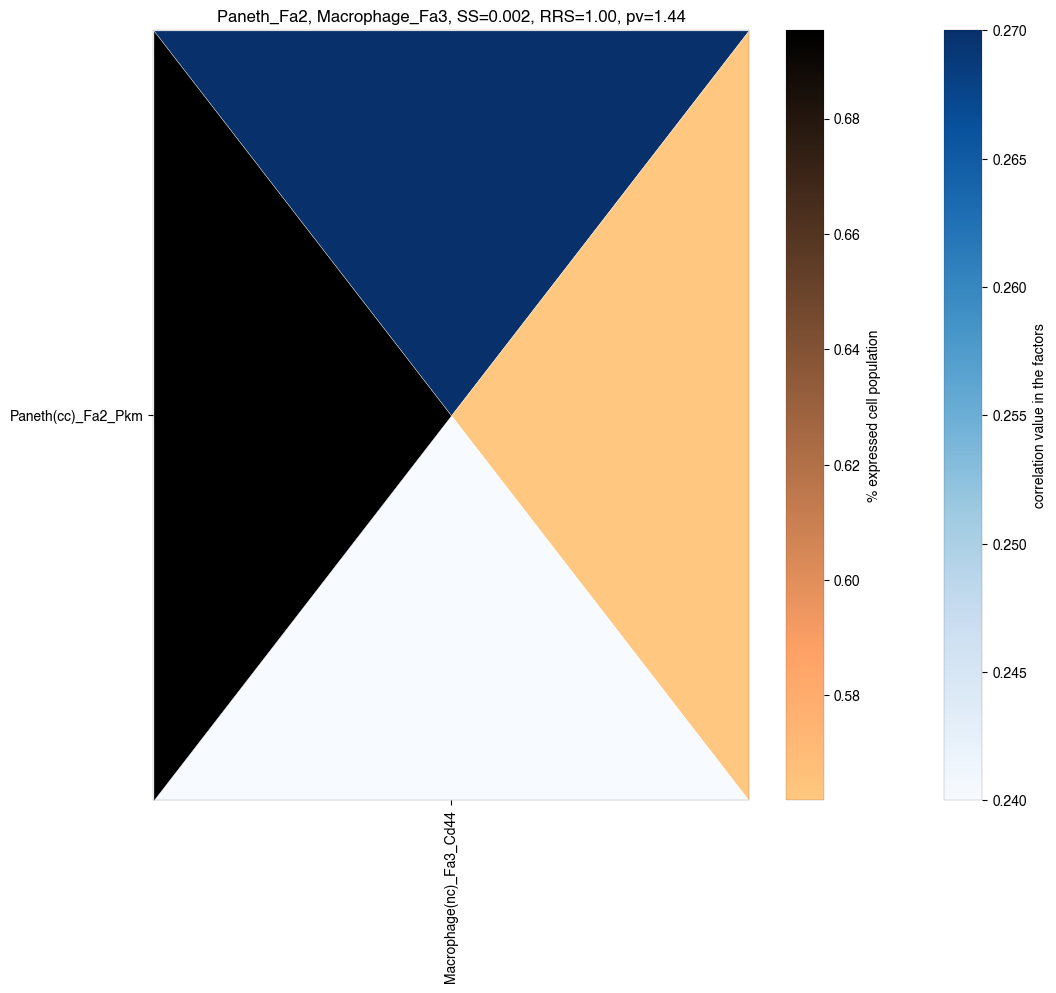

In [30]:
#Perform ligand receptors analysis of Paneth Niche with all other cell types with any factor")

scov.find_LR_interactions_in_interacting_cell_types(all_output_data,choose_interacting_celltype_pair=['Paneth'],
    choose_factors_id=[], LR_plot_NMF_Fa_thres=0.2,LR_plot_Exp_thres=0.2)


In [31]:
# save data in excel sheet for each cell type association with factors of spearman gene correlation and cosine similarity. 

scov.make_excel_sheet_for_gene_correlation(all_output_data)

In [32]:
# save all LR interactions for all cell type and its niche in excel sheet 
# and summary of significant niche in text file. 
scov.save_LR_interactions_in_excelsheet_and_regression_summary_in_textfile_for_interacting_cell_types(all_output_data,
pvalueCutoff=0.05,correlation_with_spearman=True,
LR_plot_NMF_Fa_thres=0.2,LR_plot_Exp_thres=0.2,number_of_top_genes_to_print=5)

The Excel sheet is saved:  ./spatial_ct_ct_interactions/covariations_R0_F3/Lig_and_Rec_enrichment_in_interacting_celltypes.xlsx
The text file is saved: ./spatial_ct_ct_interactions/covariations_R0_F3/Regression_summary.txt


The pathway figures are saved in  ./spatial_ct_ct_interactions/covariations_R0_F3/Pathway_figures/
cell types found  ['Stem/TA']


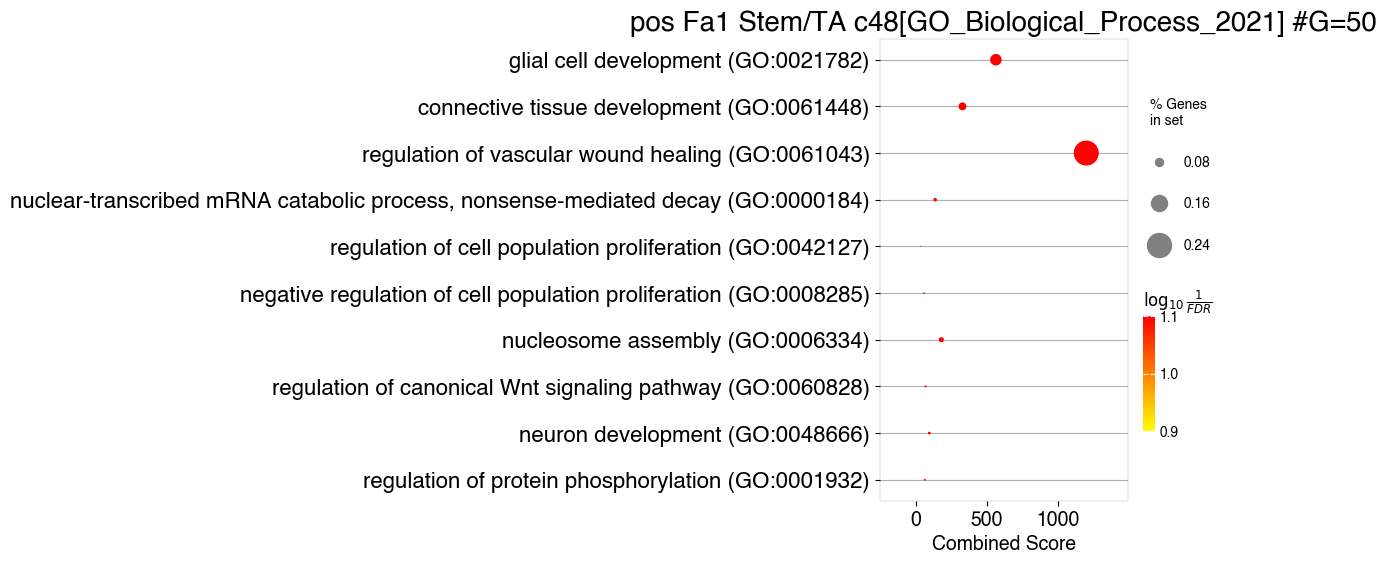

In [33]:
#Perform pathway analysis for top positively correlated genes of Fa1 of Stem/TA using the gseapy package
scov.pathway_analysis(all_output_data,choose_celltypes=['Stem/TA'],
NOG_pathway=50,choose_factors_id=[1],
positively_correlated=True,savefigure=False,database=['GO_Biological_Process_2021'])

The pathway figures are saved in  ./spatial_ct_ct_interactions/covariations_R0_F3/Pathway_figures/
cell types found  ['Stem/TA']


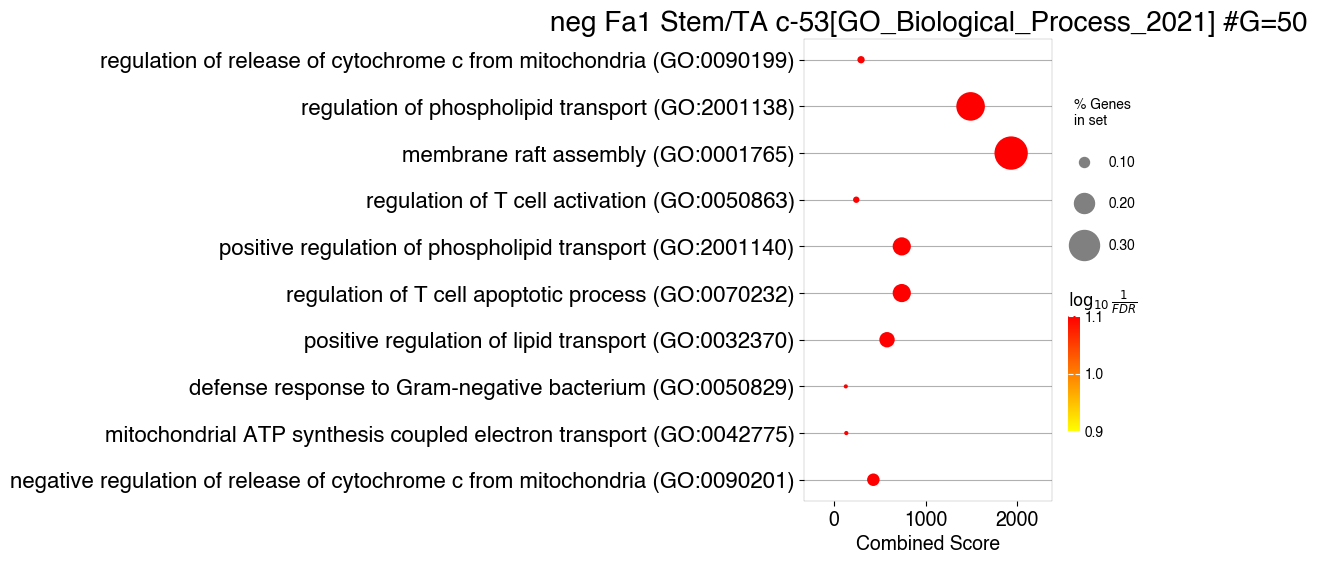

In [34]:
#Perform pathway analysis for top negatively correlated genes of Fa1 of Stem/TA using the gseapy package
scov.pathway_analysis(all_output_data,choose_celltypes=['Stem/TA'],
NOG_pathway=50,choose_factors_id=[1],
positively_correlated=False,savefigure=False,database=['GO_Biological_Process_2021'])

The pathway figures are saved in  ./spatial_ct_ct_interactions/covariations_R0_F3/Pathway_figures/
cell types found  ['Paneth']


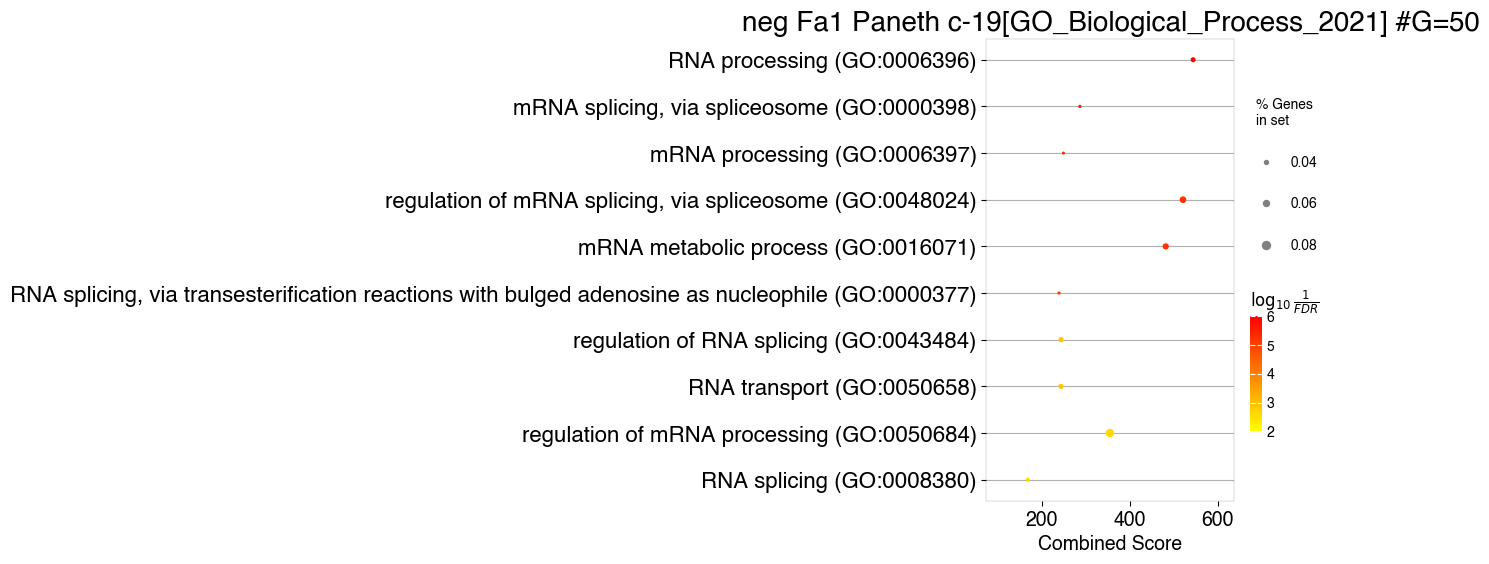

In [35]:
#Perform pathway analysis for top negatively correlated genes of all the factors of Paneth using the gseapy package

scov.pathway_analysis(all_output_data,choose_celltypes=['Paneth'],NOG_pathway=50,choose_factors_id=[],
                      positively_correlated=False,savefigure=False,database=['GO_Biological_Process_2021'])


The pathway figures are saved in  ./spatial_ct_ct_interactions/covariations_R0_F3/Pathway_figures/
cell types found  ['Stem/TA']


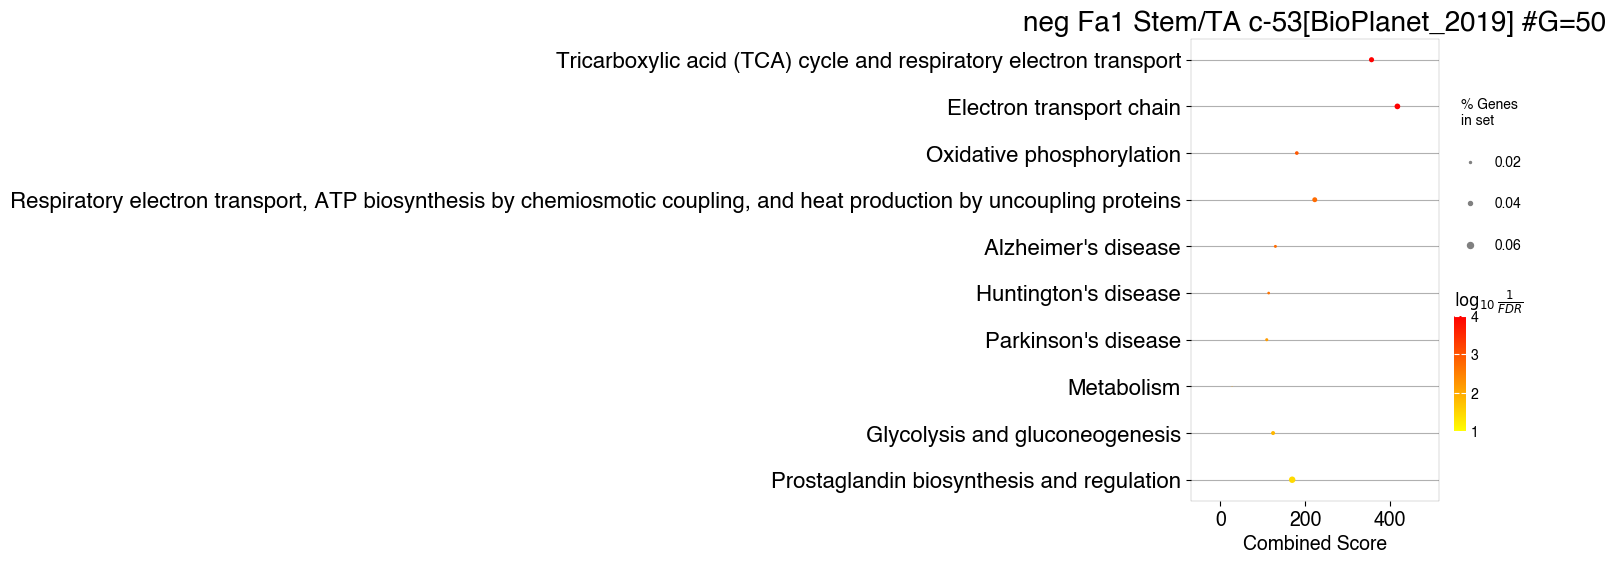

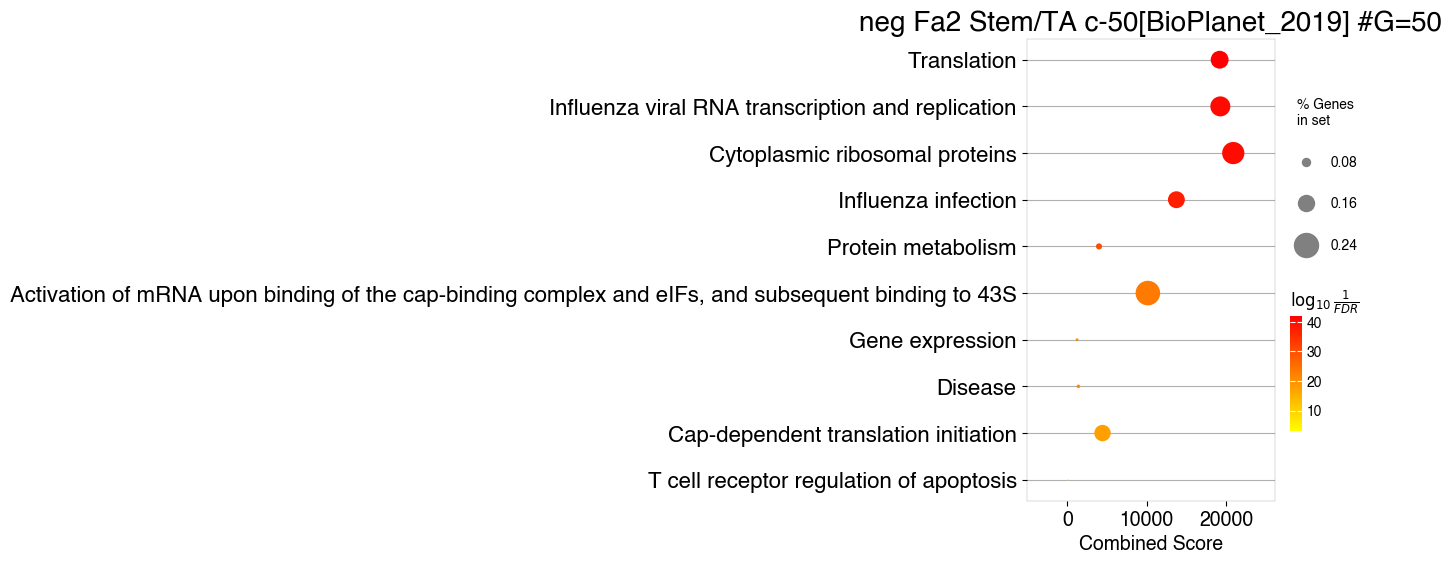

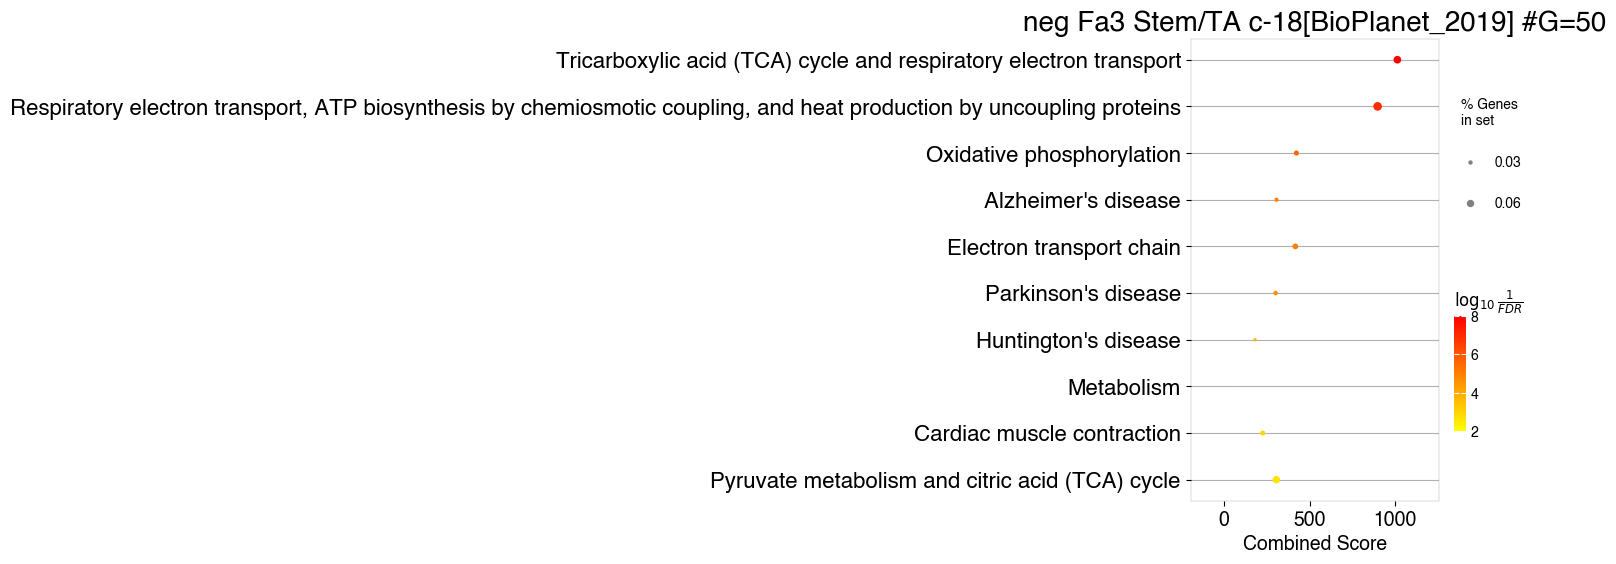

In [36]:
#Perform pathway analysis for top negatively correlated genes of all the factors of Paneth using the gseapy package

scov.pathway_analysis(all_output_data,choose_celltypes=['Stem/TA'],NOG_pathway=50,choose_factors_id=[],
                      positively_correlated=False,savefigure=False,database=['BioPlanet_2019'])

cell types found  ['Paneth']
The figures are saved:  ./spatial_ct_ct_interactions/covariations_R0_F3/dotplots/Paneth.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


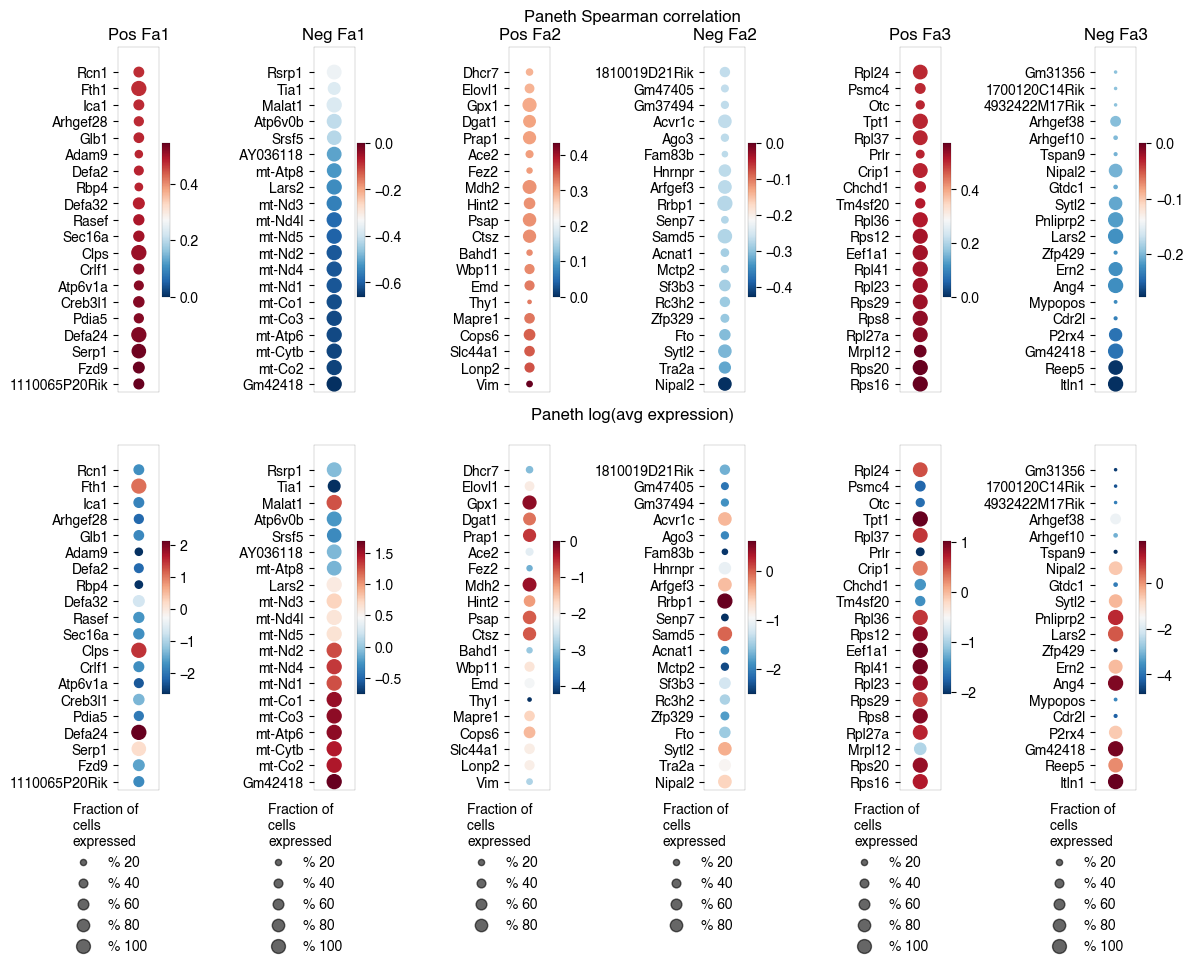

In [38]:
#show all the positive and negative correlated genes of all the factors in one plot 
scov.plot_top_selected_genes_for_all_factors_from_chosen_celltype(all_output_data,choose_celltypes=['Paneth'])

cell types found  ['Stem/TA']
The figures are saved:  ./spatial_ct_ct_interactions/covariations_R0_F3/dotplots/Stem_TA.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


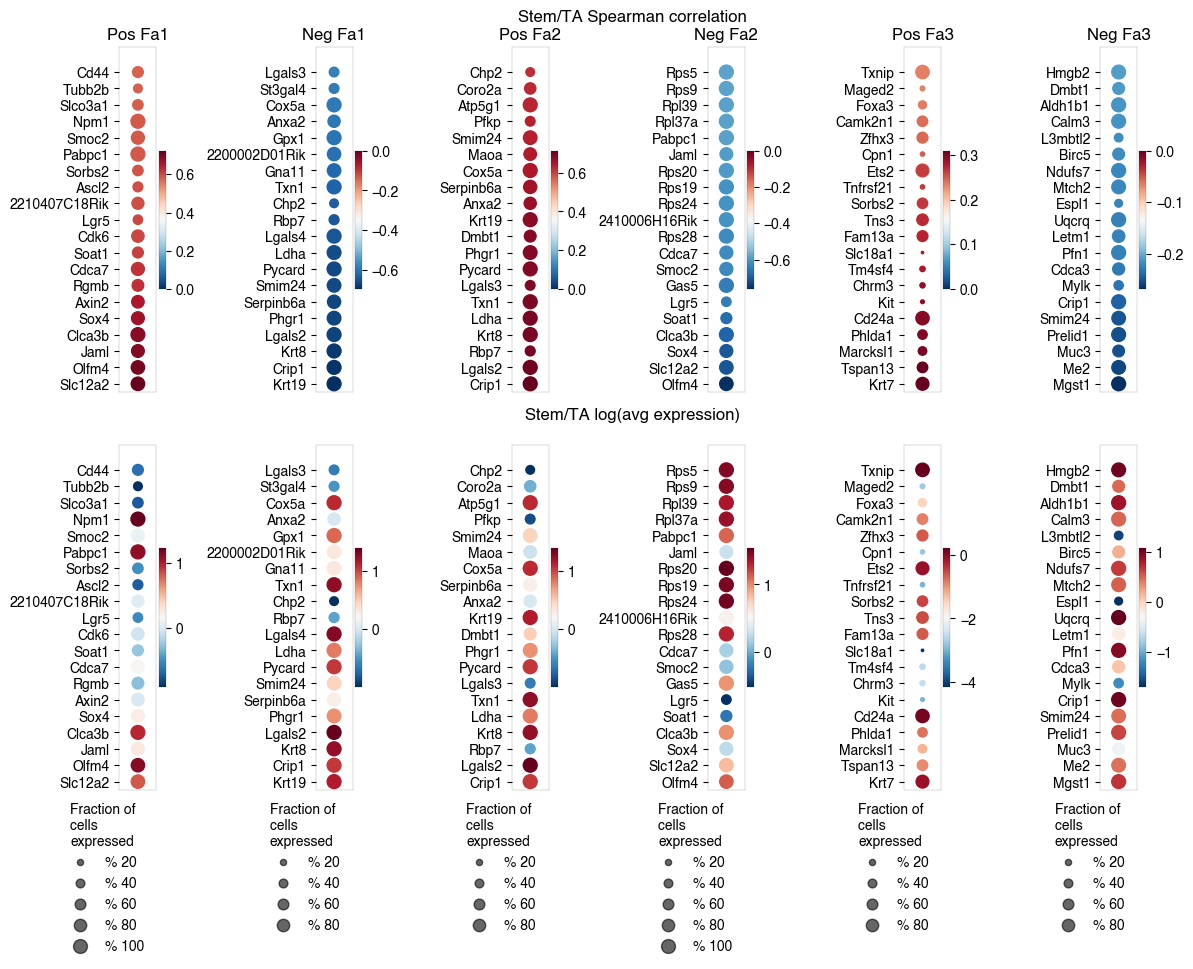

In [39]:
scov.plot_top_selected_genes_for_all_factors_from_chosen_celltype(all_output_data,choose_celltypes=['Stem/TA'])

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


The figures are saved:  ./spatial_ct_ct_interactions/covariations_R0_F3/scRNAseq_factors_in_umap.pdf


Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


0

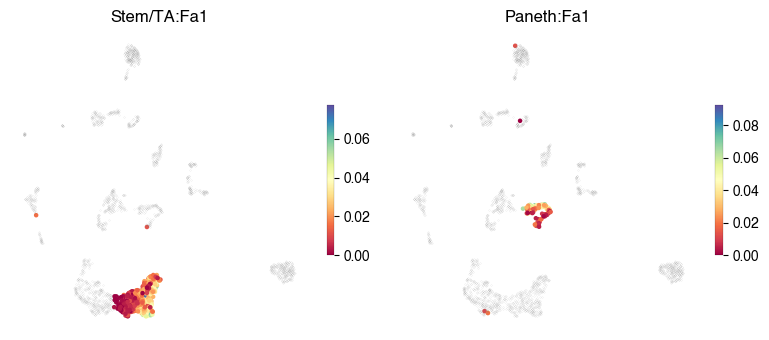

In [40]:
#visualize selected factors in single cell RNA seq data 
scov.visualize_factors_in_scRNAseq_umap(all_output_data,choose_interacting_celltype_pair=['Stem/TA','Paneth'],visualize_factors_id=[1,1])


The figures are saved:  ./spatial_ct_ct_interactions/covariations_R0_F3/spatial_factors_in_umap.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


0

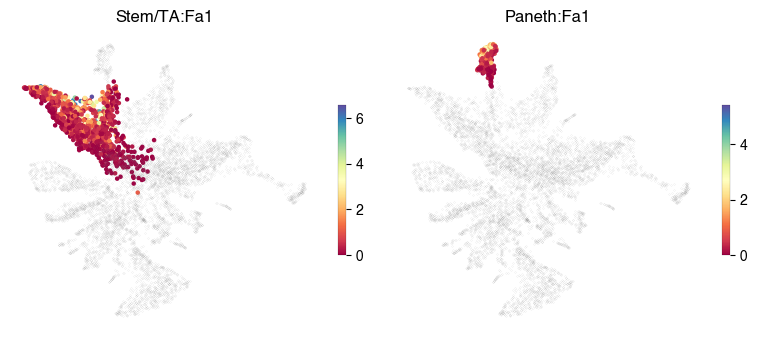

In [41]:
#visualize selected factors in spatial data 
scov.visualize_factors_in_spatial_umap(all_output_data,choose_interacting_celltype_pair=['Stem/TA','Paneth'],visualize_factors_id=[1,1])
